In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv("CyberBullying_Dataset.csv")

In [3]:
print(df.head(10))
print("====================================================================================")
print(df.info())
print("====================================================================================")
print(df['CB_Label'].value_counts())

                                                Text  CB_Label
0  damn there is someones nana up here at beach w...         0
1  no kidding! dick clark was a corpse mechanical...         0
2  i read an article on jobros and thought damn w...         0
3  I got one fucking day of sprinkles and now it'...         0
4  I was already listening to Elliott smith  and ...         0
5  I told Derek to go fuck himself  Devyn told us...         0
6  I'm watching the new Smosh video and laughing ...         0
7  My mom didn't like Catholicism because the ide...         0
8  ya i know! lol AND big thunder mountain broke ...         0
9                                  lucky bitch....."         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      11100 non-null  object
 1   CB_Label  11100 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 173.6

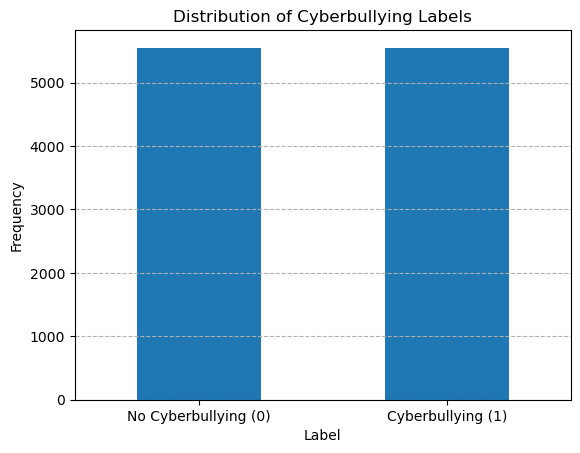

In [4]:
df['CB_Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Cyberbullying Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No Cyberbullying (0)', 'Cyberbullying (1)'], rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()

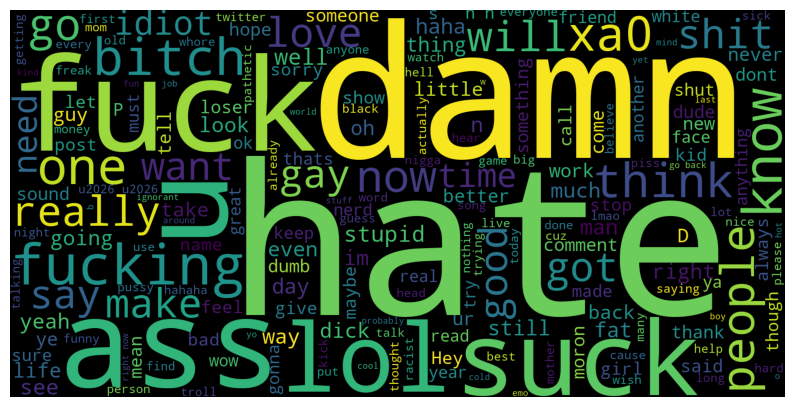

In [5]:
import wordcloud

common_words = ""
for sentence in df['Text']:
    sentence = str(sentence)
    tokens = sentence.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud(width=1600, height=800).generate(common_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
import pandas as pd
import re

# Define a function to detect emojis
def detect_emojis(text):
    # Regex pattern to match emojis
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F700-\U0001F77F"
        "\U0001F780-\U0001F7FF"
        "\U0001F800-\U0001F8FF"
        "\U0001F900-\U0001F9FF"
        "\U0001FA00-\U0001FA6F"
        "\U0001FA70-\U0001FAFF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    # Find all emojis in the text
    return emoji_pattern.findall(text)

# Apply the function to each element of the 'Text' column
res = df['Text'].apply(detect_emojis)
print("Result (False: Emoji not exist): " + str(any(res)))



Result (False: Emoji not exist): False


In [7]:
from collections import Counter
# concatenate all the text from the 'Text' column into a single string
all_text = ' '.join(df['Text'])

# count the occurrences of each unique word
word_counts = Counter(all_text.split())

# 10 most common words
most_common_words = word_counts.most_common(10)

print(most_common_words)

[('you', 4799), ('the', 4167), ('a', 4075), ('I', 3700), ('to', 3684), ('and', 2638), ('that', 1974), ('your', 1949), ('of', 1896), ('is', 1770)]


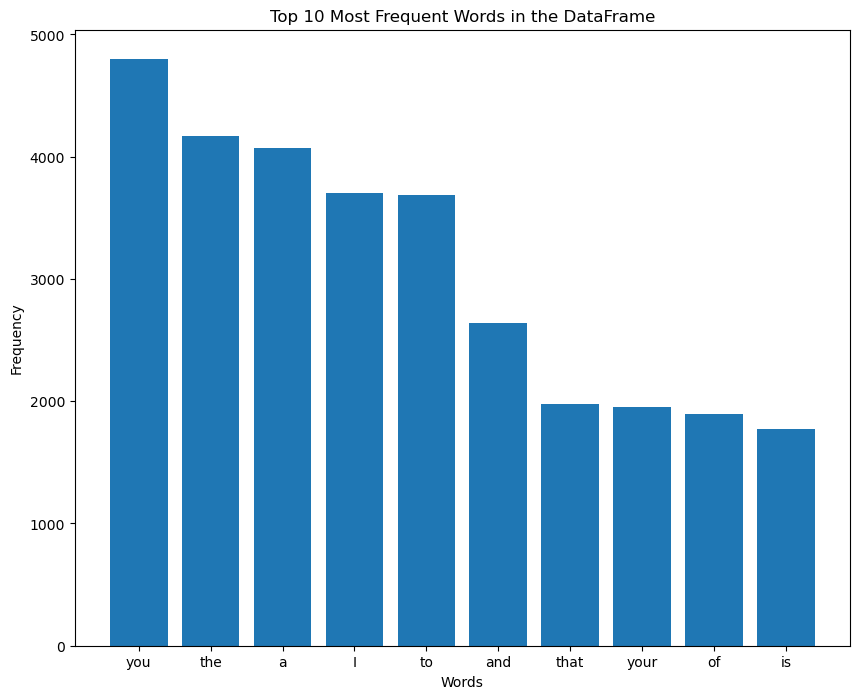

In [8]:
words, counts = zip(*most_common_words)

# Create the bar chart
plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in the DataFrame')
plt.show()

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer


def clean_text(text):
    text = text.lower()
    # Remove punctuation
    # text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in string.punctuation]

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word=word, pos='v') for word in filtered_tokens]

    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text

df['Cleaned_Text'] = df['Text'].apply(clean_text)
df.head()


,Text,CB_Label,Cleaned_Text
0,damn there is someones nana up here at beach w...,0,damn someones nana beach one dont think ic ste...
1,no kidding! dick clark was a corpse mechanical...,0,kid dick clark corpse mechanically operate adv...
2,i read an article on jobros and thought damn w...,0,read article jobros think damn cash jobro poke...
3,I got one fucking day of sprinkles and now it'...,0,get one fuck day sprinkle 's back sunshine dou...
4,I was already listening to Elliott smith and ...,0,already listen elliott smith fuck hate kanye w...


In [11]:
from collections import Counter
# concatenate all the text from the 'Text' column into a single string
all_text = ' '.join(df['Cleaned_Text'])

# count the occurrences of each unique word
word_counts = Counter(all_text.split())

# 10 most common words
most_common_words = word_counts.most_common(10)

print(most_common_words)

[('``', 3640), ("''", 3342), ('fuck', 1670), ('...', 1622), ("'s", 1465), ("n't", 1414), ('hate', 1393), ('get', 1336), ('damn', 1235), ('like', 1193)]


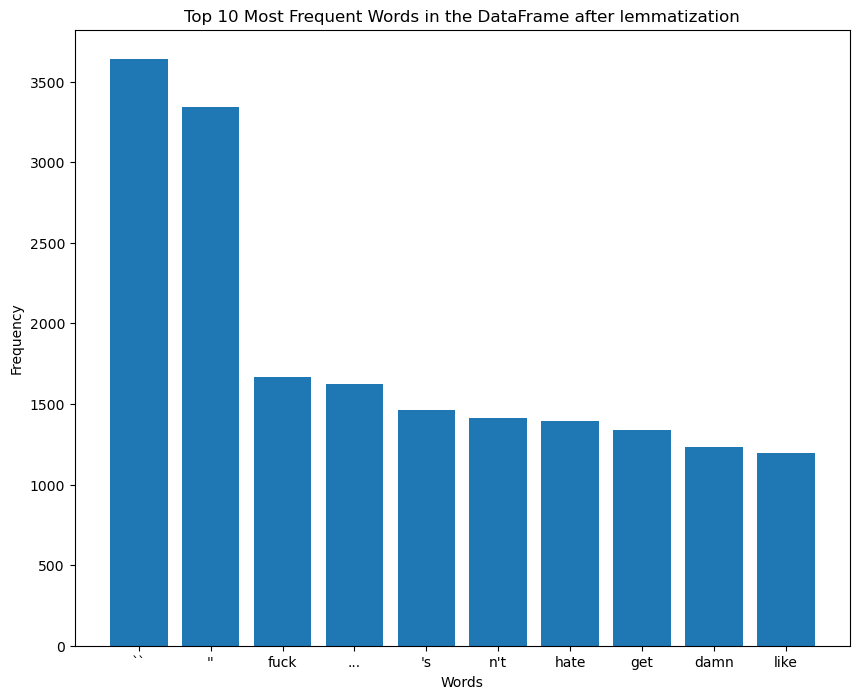

In [12]:
words, counts = zip(*most_common_words)

# Create the bar chart
plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in the DataFrame after lemmatization')
plt.show()

In [13]:
import re
def clean_text(text):
    text = text.replace("''", '')
    text = text.replace("...", '')
    text = re.sub(r"[^a-zA-Z0-9\s]", '', text)
    return text

df['Cleaned_Text'] = df['Cleaned_Text'].apply(clean_text)
df.head()

,Text,CB_Label,Cleaned_Text
0,damn there is someones nana up here at beach w...,0,damn someones nana beach one dont think ic ste...
1,no kidding! dick clark was a corpse mechanical...,0,kid dick clark corpse mechanically operate adv...
2,i read an article on jobros and thought damn w...,0,read article jobros think damn cash jobro poke...
3,I got one fucking day of sprinkles and now it'...,0,get one fuck day sprinkle s back sunshine douc...
4,I was already listening to Elliott smith and ...,0,already listen elliott smith fuck hate kanye w...


[('fuck', 1677), ('s', 1470), ('nt', 1416), ('hate', 1396), ('get', 1336), ('damn', 1237), ('like', 1193), ('ass', 1048), ('go', 888), ('suck', 870)]



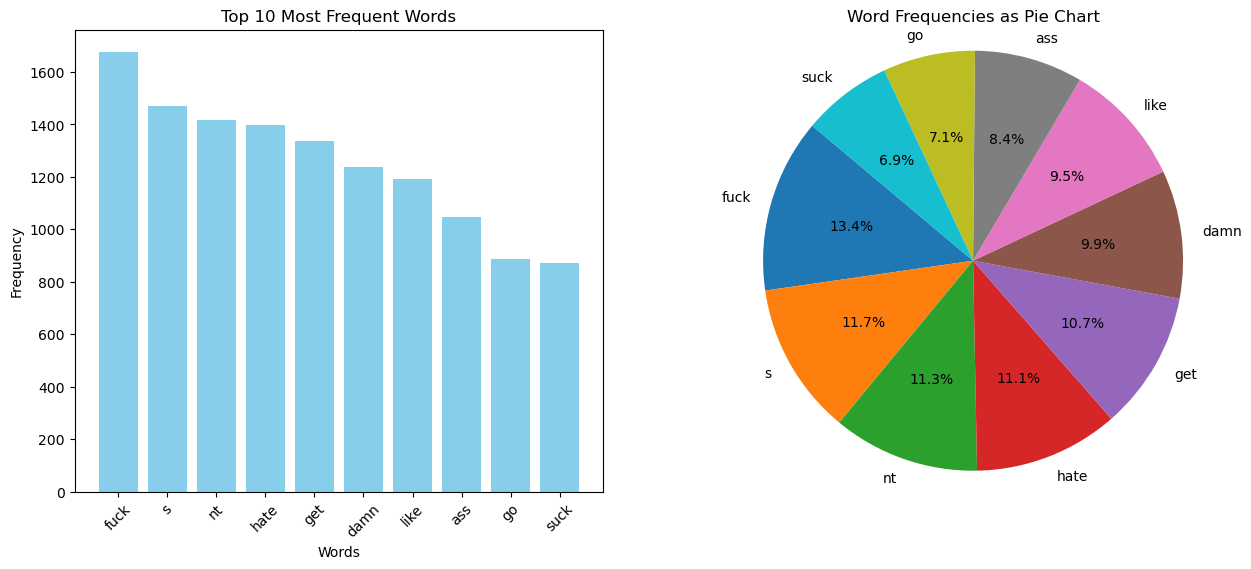

In [14]:
from collections import Counter
# concatenate all the text from the 'Text' column into a single string
all_text = ' '.join(df['Cleaned_Text'])

# count the occurrences of each unique word
word_counts = Counter(all_text.split())

# 10 most common words
most_common_words = word_counts.most_common(10)

print(most_common_words)
print()

words, counts = zip(*most_common_words)

# create bar chart beside the pie chart
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart on the first
ax[0].bar(words, counts, color='skyblue')
ax[0].set_title('Top 10 Most Frequent Words')
ax[0].set_xlabel('Words')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)

# Pie chart on the second
ax[1].pie(counts, labels=words, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Word Frequencies as Pie Chart')
ax[1].axis('equal')

plt.show()

Data Pre-processing

In [15]:
slang_dict = {
    "lol": "laughing out loud",
    "idk": "I do not know",
    "brb": "be right back",
    "btw": "by the way",
    "omg": "oh my god",
    "ugh": "expression of frustration"
}

def replace_slang(text, slang_dict):
    # Split the text into words
    words = text.split()

    # Replace slang words based on the dictionary
    replaced_text = [slang_dict.get(word, word) for word in words]

    return ' '.join(replaced_text)


df['Cleaned_Text'] = df['Cleaned_Text'].apply(lambda text: replace_slang(text, slang_dict))
df.head()

,Text,CB_Label,Cleaned_Text
0,damn there is someones nana up here at beach w...,0,damn someones nana beach one dont think ic ste...
1,no kidding! dick clark was a corpse mechanical...,0,kid dick clark corpse mechanically operate adv...
2,i read an article on jobros and thought damn w...,0,read article jobros think damn cash jobro poke...
3,I got one fucking day of sprinkles and now it'...,0,get one fuck day sprinkle s back sunshine douc...
4,I was already listening to Elliott smith and ...,0,already listen elliott smith fuck hate kanye w...


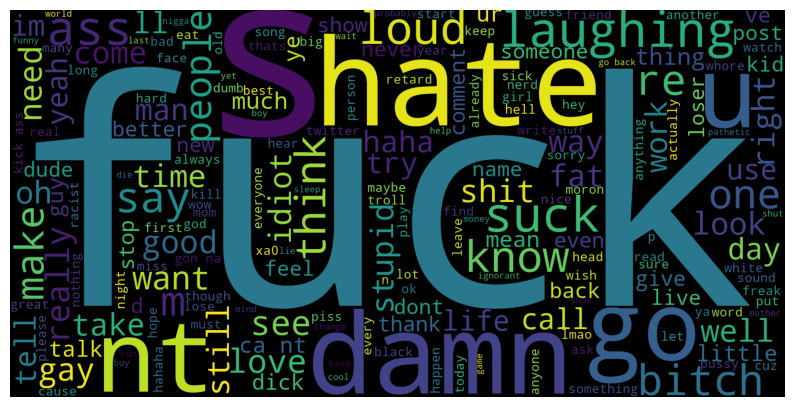

In [16]:
import wordcloud

common_words = ""
for sentence in df['Cleaned_Text']:
    sentence = str(sentence)
    tokens = sentence.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud(width=1600, height=800).generate(common_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [17]:
import spacy
import pandas as pd

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Function to count noun phrases and verbs
def extract_syntactic_features(text):
    doc = nlp(text)
    num_noun_phrases = sum(1 for chunk in doc.noun_chunks)
    num_verbs = sum(1 for token in doc if token.pos_ == "VERB")
    return num_noun_phrases, num_verbs

# Apply the function to each text in the DataFrame
df[['num_noun_phrases', 'num_verbs']] = df['Cleaned_Text'].apply(lambda x: pd.Series(extract_syntactic_features(x)))

df.head()


,Text,CB_Label,Cleaned_Text,num_noun_phrases,num_verbs
0,damn there is someones nana up here at beach w...,0,damn someones nana beach one dont think ic ste...,2,3
1,no kidding! dick clark was a corpse mechanical...,0,kid dick clark corpse mechanically operate adv...,2,1
2,i read an article on jobros and thought damn w...,0,read article jobros think damn cash jobro poke...,2,2
3,I got one fucking day of sprinkles and now it'...,0,get one fuck day sprinkle s back sunshine douc...,2,2
4,I was already listening to Elliott smith and ...,0,already listen elliott smith fuck hate kanye w...,1,1


In [18]:
df.head()


,Text,CB_Label,Cleaned_Text,num_noun_phrases,num_verbs
0,damn there is someones nana up here at beach w...,0,damn someones nana beach one dont think ic ste...,2,3
1,no kidding! dick clark was a corpse mechanical...,0,kid dick clark corpse mechanically operate adv...,2,1
2,i read an article on jobros and thought damn w...,0,read article jobros think damn cash jobro poke...,2,2
3,I got one fucking day of sprinkles and now it'...,0,get one fuck day sprinkle s back sunshine douc...,2,2
4,I was already listening to Elliott smith and ...,0,already listen elliott smith fuck hate kanye w...,1,1


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['CB_Label'], axis=1)
y = df['CB_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocess_steps = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Cleaned_Text'),
        ('scale', MinMaxScaler(), ['num_noun_phrases', 'num_verbs'])
    ]
)

data_pipeline = make_pipeline(
    preprocess_steps,
    MultinomialNB()
)

data_pipeline.fit(X_train, y_train)
y_pred = data_pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100}")
print(classification_report(y_test, y_pred))

Accuracy: 72.11711711711712
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1128
           1       0.73      0.69      0.71      1092

    accuracy                           0.72      2220
   macro avg       0.72      0.72      0.72      2220
weighted avg       0.72      0.72      0.72      2220



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['Text', 'CB_Label'], axis=1)
y = df['CB_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocess_steps = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Cleaned_Text'),
        ('scale', MinMaxScaler(), ['num_noun_phrases', 'num_verbs'])
    ]
)

nb_pipeline = make_pipeline(
    preprocess_steps,
    MultinomialNB()
)

param_grid = {
    'multinomialnb__alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
}

grid_search = GridSearchCV(
    nb_pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_nb = grid_search.best_estimator_

y_pred = best_nb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best hyperparameters: {'multinomialnb__alpha': 2.0}
Accuracy: 72.38738738738739
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1128
           1       0.73      0.69      0.71      1092

    accuracy                           0.72      2220
   macro avg       0.72      0.72      0.72      2220
weighted avg       0.72      0.72      0.72      2220



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['Text', 'CB_Label'], axis=1)
y = df['CB_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_distributions = {
    'multinomialnb__alpha': uniform(0.0001, 1)
}
preprocess_steps = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Cleaned_Text'),
        ('scale', MinMaxScaler(), ['num_noun_phrases', 'num_verbs'])
    ])

nb_pipeline = make_pipeline(
    preprocess_steps,
    MultinomialNB()
)

random_search = RandomizedSearchCV(
    nb_pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)
best_nb = random_search.best_estimator_

y_pred = best_nb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'multinomialnb__alpha': 0.9869869366005173}
Accuracy: 72.11711711711712
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1128
           1       0.73      0.69      0.71      1092

    accuracy                           0.72      2220
   macro avg       0.72      0.72      0.72      2220
weighted avg       0.72      0.72      0.72      2220

